In [1]:
!pip install uproot3
!pip install uproot_methods
!pip install mplhep

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import uproot3 as ROOT
import uproot_methods as ROOT_methods
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep


In [4]:
!ls drive/MyDrive/Event_Sample/

BKG_Drellyan.root  DM_10GeV_scalar_d.root  pow_delph_nlo.root


이번 시간에는 Transverse mass 재건을 해보도록 합시다.


코드 실행에 앞서 검출기 시뮬레이션이 완료된 경입자를 하나 이상 포함하는 사건 샘플을 준비해주세요.

In [5]:
# TTree를 읽어옵니다

tree = ROOT.open("/content/drive/MyDrive/Event_Sample/pow_delph_nlo.root")["Delphes"]

In [6]:
# 전자와 MET의 pt, eta, phi를 받아옵니다.
# 이번시간에는 로렌츠 벡터를 활용한 방법이 아닌 보편적 방법으로 실습을 진행합니다.
# eta는 다음 계산에서 필요없지만, 로렌츠 벡터를 활용하려면 필요합니다.

elec_pt = tree["Electron.PT"].array()
elec_eta = tree["Electron.Eta"].array()
elec_phi = tree["Electron.Phi"].array()

met_pt = tree["MissingET.MET"].array()
met_eta = tree["MissingET.Eta"].array()
met_phi = tree["MissingET.Phi"].array()

In [7]:
# 만약 생성과정중 뮤온이 있다면 뮤온도 해볼까요?

muon_pt = tree["Muon.PT"].array()
muon_eta = tree["Muon.Eta"].array()
muon_phi = tree["Muon.Phi"].array()

In [8]:
# met를 평평하게 해줍니다.
met_pt = met_pt.flatten()
met_phi = met_phi.flatten()

In [9]:
# Transverse mass를 계산합니다. 두 입자계에서의 공식은 위키피디아에 잘 설명되어 있습니다.

# 빈 배열을 설정하고
tvmass_elec = []
tvmass_muon = []

# for 문을 통해 Leading Electron과 MET 사이의 MT를 계산해줍니다.
for i in range(len(elec_pt)):
  if elec_pt.counts[i] > 0:
    tvmass_elec.append(np.sqrt(2*elec_pt[i,0]*met_pt[i]*(1. - np.cos(elec_phi[i,0]-met_phi[i]))))
  if muon_pt.counts[i] > 0:
    tvmass_muon.append(np.sqrt(2*muon_pt[i,0]*met_pt[i]*(1. - np.cos(muon_phi[i,0]-met_phi[i]))))


print(len(tvmass_elec))
print(len(tvmass_muon))

4633
5725


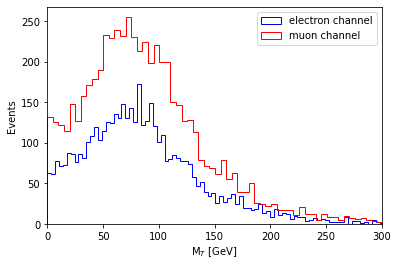

In [12]:
## 뽑아온 친구들로 MT에 대한 히스토그람을 작성합시다.

plt.hist(tvmass_elec,bins=150,color='blue',histtype='step',label = 'electron channel')
plt.hist(tvmass_muon,bins=150,color='red',histtype='step', label = 'muon channel')
plt.xlim(0,300)
plt.xlabel("M$_{T}$ [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()

In [14]:
## HOMEWORK
# Q1. 이 Transverse mass 분포의 정상부분을 무엇이라고 하는지 알아보세요.




In [15]:
# Q2. 전자와 뮤온배열에서 i번째의 0번째를 뽑아오는것은 왜 그럴까요?



In [16]:
# Q3. 저의 결과는 아마 여러분의 결과와 다를 것입니다. 왜 그런지 자유롭게 생각해보세요.


In [17]:
# Q4. 이제 여러분들은 입자물리학실험에서 W 보존을 식별하고 찾아낼 수 있습니다. 이 분석 결과를 CMS 혹은 ATLAS의 결과와 비교해보세요.
